Slider{Int64}([Input{Int64}] 30,"r",30,10:10:50)

Slider{Int64}([Input{Int64}] 50,"n",50,10:10:100)

Slider{Int64}([Input{Int64}] 50,"Q",50,10:10:100)

INFO: Loading help data...


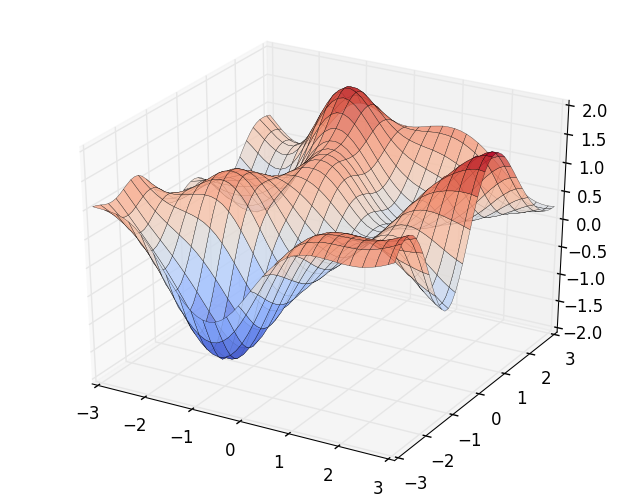

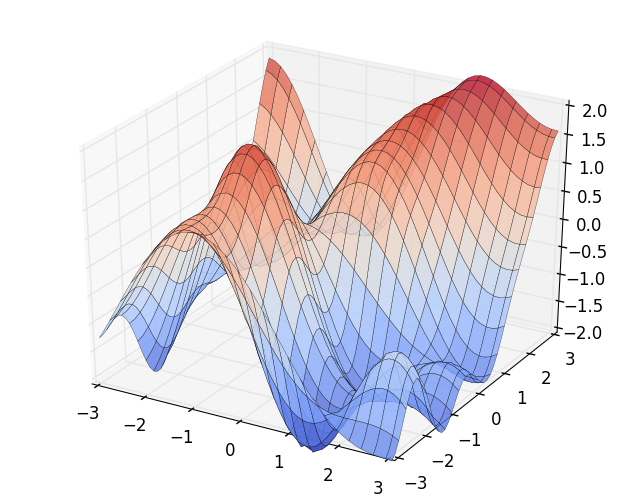

In [1]:
using Interact
using GaussianProcess
using GPT_SGLD
using PyPlot

length_scale=1; #length_scale for RBF kernel of GP
xylim=3; #range of x,y is (-xylim,xylilm)
resolution=50; #number of samples per dimension

x,y,X=createmesh(-xylim,xylim,resolution);

f=SECov(length_scale,1);
mygp=GP(0,f,2); #2D example


z=GPrand(mygp,X);
z=reshape(z,resolution,resolution)
surf(x,y,z,rstride=2, edgecolors="k", cstride=2, cmap=ColorMap("coolwarm"), alpha=0.8, linewidth=0.25)
axGP=gca()
axGP[:set_zlim]([-2,2])

f=figure()
@manipulate for r=10:10:50, n=10:10:100, Q=10:10:100; withfig(f) do
        fhat=fhatdraw(X,n,length_scale,r,Q)
        fhat=reshape(fhat,resolution,resolution)
        surf(x,y,fhat,rstride=2, edgecolors="k", cstride=2, cmap=ColorMap("coolwarm"), alpha=0.8, linewidth=0.25)
        ax=gca()
        ax[:set_zlim]([-2,2])
    end

end


Slider{Int64}([Input{Int64}] 25,"r",25,5:5:50)

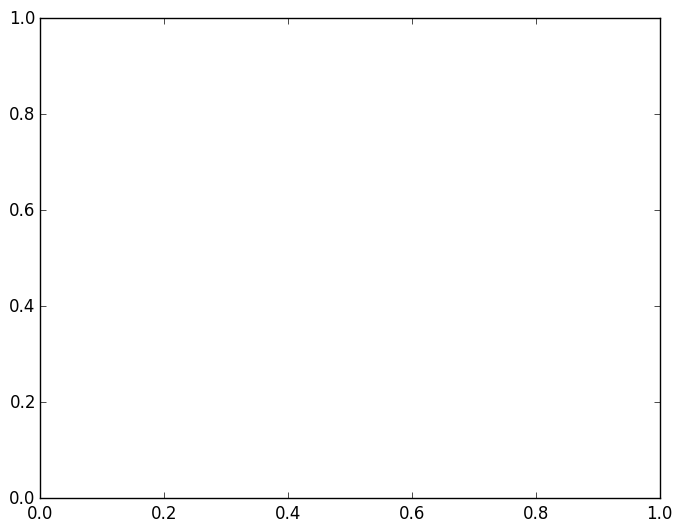

Figure(PyObject <matplotlib.figure.Figure object at 0x7f637b798e10>)

Figure(PyObject <matplotlib.figure.Figure object at 0x7f637c0c4910>)

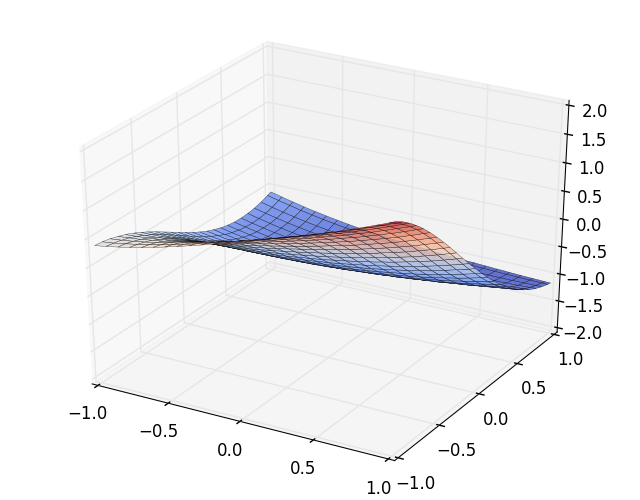

Figure(PyObject <matplotlib.figure.Figure object at 0x7f637b65a490>)

Figure(PyObject <matplotlib.figure.Figure object at 0x7f637b3c7e90>)

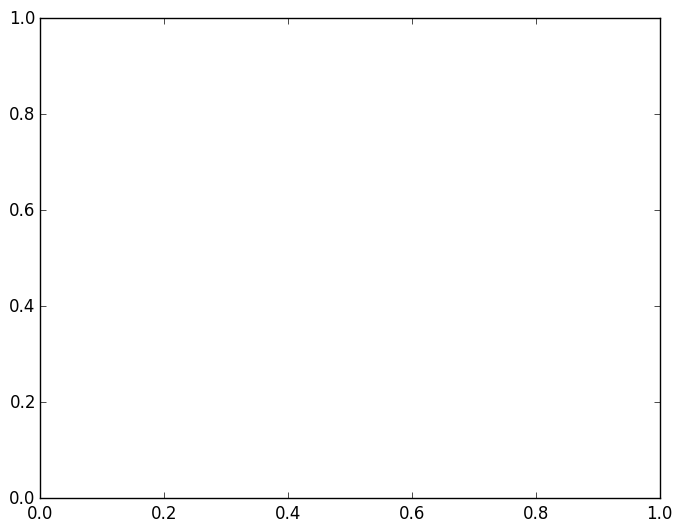

In [94]:
using Interact
using GaussianProcess
using GPT_SGLD
using PyPlot
using Distributions

function createmesh(interval_start,interval_end,npts)
    x=linspace(interval_start,interval_end,npts)
    y=linspace(interval_start,interval_end,npts)
    xgrid=repmat(x',npts,1)
    ygrid=repmat(y,1,npts)
    grid=Array(Float64,npts^2,2); k=1;
    for i=1:npts
        for j=1:npts
            grid[k,:]=[x[i] y[j]];
            k+=1;
        end
    end
    #grid=[x[1] y[1]; x[1] y[2]; ...]
    return xgrid,ygrid,grid
end

function plot_3d(xgrid,ygrid,y,ax)
    npts=size(xgrid,1)
    z=reshape(y,npts,npts)
    fig=figure()
    
    ax[:plot_surface](xgrid,ygrid,z,rstride=2, edgecolors="k", cstride=2, cmap=ColorMap("coolwarm"), alpha=0.8, linewidth=0.25)
end

function fhatdraw(X,n,length_scale,r,Q)
    N,D=size(X)
    scale=sqrt(n/(Q^(1/D)));
    seed=17;
    phi=feature(X,n,length_scale,seed,scale)
    sigma_w=1;
    w=sigma_w*randn(Q)
    U=Array(Float64,n,r,D)
    for k=1:D
        Z=randn(r,n)
        U[:,:,k]=transpose(\(sqrtm(Z*Z'),Z)) #sample uniformly from V_{n,r}
    end
    I=samplenz(r,D,Q,seed)
    
    return pred(w,U,I,phi)
end

length_scale=1;
f=SECov(length_scale,1);
mygp=GP(0,f,2);

resolution=50;
xgrid,ygrid,X=createmesh(-1,1,resolution);
z=GPrand(mygp,X);
g=figure()
axGP=g[:add_subplot](1,1,1, projection = "3d")
plot_3d(xgrid,ygrid,z,axGP)
axGP[:set_zlim]([-2,2])

f=figure()
ax=fig[:add_subplot](1,1,1, projection = "3d")
@manipulate for r=5:5:50; withfig(f,clear=false) do
        ax[:cla]()
        fhat=fhatdraw(X,100,length_scale,r,50)
        #fhat=reshape(fhat,resolution,resolution)
        plot_3d(x,y,fhat,ax)
        ax[:set_zlim]([-2,2])
    end

end


Slider{Float64}([Input{Float64}] 2.0,"α",2.0,1.0:0.1:3.0)

Slider{Float64}([Input{Float64}] 2.0,"β",2.0,1.0:0.1:3.0)

Slider{Float64}([Input{Float64}] 2.0,"γ",2.0,1.0:0.1:3.0)

Checkbox([Input{Bool}] false,"leg",false)

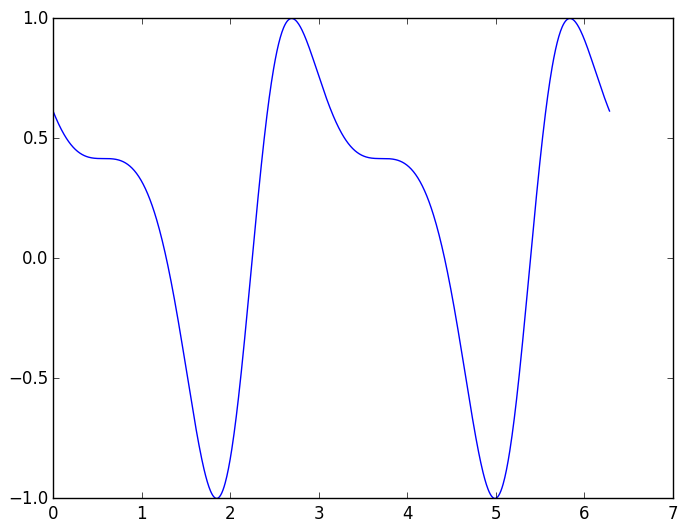

In [37]:
using Interact
using PyPlot

f = figure()
x = linspace(0,2π,1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg=false; withfig(f) do
        plot(x, cos(α*x + sin(β*x + γ)))
        if leg
            legend(["a funny plot"])
        end
    end
end

Slider{Float64}([Input{Float64}] 2.0,"α",2.0,1.0:0.1:3.0)

Slider{Float64}([Input{Float64}] 2.0,"β",2.0,1.0:0.1:3.0)

Slider{Float64}([Input{Float64}] 2.0,"γ",2.0,1.0:0.1:3.0)

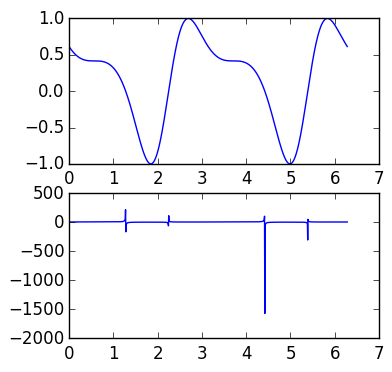

In [58]:
using Reactive, Interact
using PyPlot

x = linspace(0,2π,1000);
f= figure(figsize=(4,4))
ax1=f[:add_subplot](2,1,1)
ax2=f[:add_subplot](2,1,2)

@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3; withfig(f, clear=false) do
        y = cos(α*x + sin(β*x + γ))
        ax1[:cla]()
        ax2[:cla]()
        ax1[:plot](x, y)
        ax2[:plot](x, 1./y)
    end
end

Slider{Float64}([Input{Float64}] 1.6,"α",1.6,0.2:0.1:3.0)

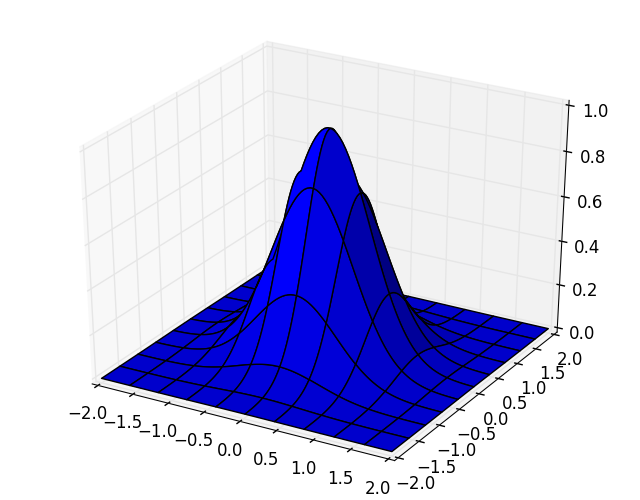

In [66]:
using PyPlot
using Interact

x = linspace(-2,2,100)
y = linspace(-2,2,100)
f = figure()
@manipulate for α=0.2:0.1:3 withfig(f) do
        surf(x, y, exp(-α * (x.^2 .+ y'.^2)))
    end
end

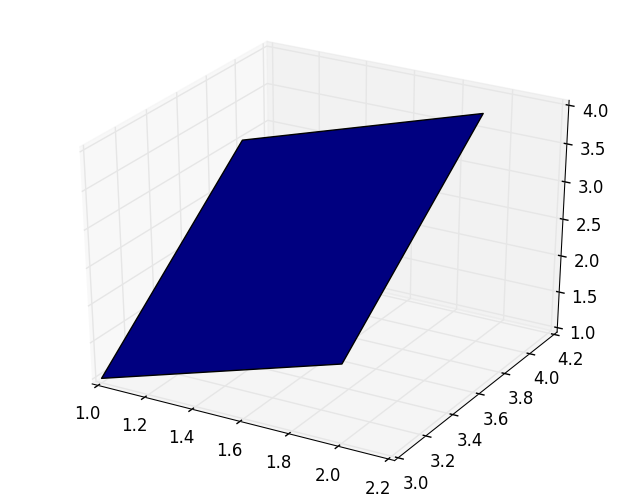

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f637ca20590>

In [68]:
using PyPlot
surf([1,2],[3,4],[1 2; 3 4])

Slider{Float64}([Input{Float64}] 1.6,"α",1.6,0.2:0.1:3.0)

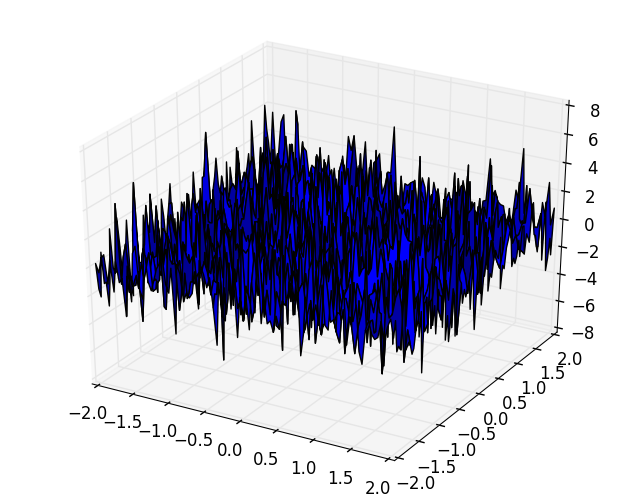

In [77]:
using PyPlot
using Interact

x = linspace(-2,2,100)
y = linspace(-2,2,100)
f = figure()
@manipulate for α=0.2:0.1:3 withfig(f) do
        surf(x, y, α*randn(100,100))
    end
end